# Evolution of Einstein's equations

# Initial data constants definition

# Initial data , setting length of the domain and discretization


In [161]:
m=1;
res=m;
N=2.0^m*100.0;
Rf=40.0;

dx=Rf/N;
dt=round(dx*0.4,digits=10);
Nt=100.0*2^m;
Tf=Nt*dt; #final time

println("the final time is ", Tf)

the final time is 16.0


In [162]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)
println("epsilon <= dx/dt * (1/2)^(2*2-1) = ", dx/dt*(1/2)^(2*2-1))

println("epsilon = dx/dt * (1/2)^(2*2) = ", dx/dt*(1/2)^(2*2))

println("epsilon = dx/dt * (1/2)^(2*3) = ", dx/dt*(1/2)^(2*3))

dx =0.2
dt =0.08
dx/dt =2.5
epsilon <= dx/dt * (1/2)^(2*2-1) = 0.3125
epsilon = dx/dt * (1/2)^(2*2) = 0.15625
epsilon = dx/dt * (1/2)^(2*3) = 0.0390625


In [163]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res$res"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1"

In [164]:
println(dx)
println(dt)

0.2
0.08


In [165]:
epsilon=0.01##0.01#0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)

0.01

# Grid

In [166]:
ori=0.0;
R1 = nothing
R1=range(ori, stop=Rf, step=dx);

print(size(R1))

(201,)

In [167]:
print(dx)
#R = range(ori-2.0*dx, stop=Rf+2.0*dx, step=dx);
R = range(round(ori-3.0*dx,digits=10), stop=Rf+3.0*dx, step=dx)

L=length(R);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)
println(size(T))
println(size(R))

println(R[L-3])
println(L)

0.2step size is  0.2
the time step is 0.08
(200,)
(207,)
40.0
207


In [168]:
include("./ScalarField.jl");

# Initial data of m β Ψ and Ψ,x

In [169]:
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initpsibar=zeros(L);
state_array=[initm initbeta initpsi initpsibar];

#sin and cos psi psi'
"#PSI BAR
sigma = 0.3
r0 = 0.7
psibar0=1
#initpsibar[4:L-3] = exp.(-((R1 ./ (1 .- R1) .- r0) ./ sigma) .^2) .* R1 .^2 .* (3 .* (R1 .- 1) .^2 .* sigma^2 - 2 .* R1 .* (r0 .* (R1 .- 1) .+ R1)) .* (R1 .- 1).^(-6) .*sigma^(-2)
initpsibar[4:L-3] = rungekutta4(SFconstraint_psibar,psibar0,R1)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);

#PSI
psi0=0
initpsi[4:L-3]=sin.(R1)#rk4wrapper(SFconstraint_psi,psi0,R1,0)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);"

#PSI BAR

#psibar0=1
c=10
sigma=3
Amp=2
initpsibar[4:L-3] = scalar_spaceder(R1)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);

#PSI
psi0=0
initpsi[4:L-3] = scalar_field(R1)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);



#BETA
beta0=0
initbeta[4:L-3]=rk4wrapper(SFconstraint_beta,beta0,R1,0)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);


#M
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,R1,0)
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);

R=0!!!R=0!!!

# Defining the initial state array for the evolution

just debugging

In [170]:
"int(x) = floor(Int, x)
print(int.([0.2 1.9]))

a=R1/dx
println(a[3])
println((R1/dx)[3])
println(state_array[int((R1/dx)[1])+1,4])
println(state_array[int((R1[1]/dx+1)),4])
println(state_array[1,4])

println(state_array[int.(R1./dx.+1),4])
println(state_array[:,4])"

"int(x) = floor(Int, x)\nprint(int.([0.2 1.9]))\n\na=R1/dx\nprintln(a[3])\nprintln((R1/dx)[3])\nprintln(state_array[int((R1/dx)[1])+1,4])\nprintln(state_array[int((R1[1]/dx+1)),4])\nprintln(state_array[1,4])\n\nprintln(state_array[int.(R1./dx.+1),4])\nprintln(state_array[:,4])"

In [171]:
state_array=[initm initbeta initpsi initpsibar];
state_array=ghost(state_array);
using CSV, Tables
CSV.write(dir*"/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv"

## Defining the initial state array for the evolution m β Ψ and Ψ,x

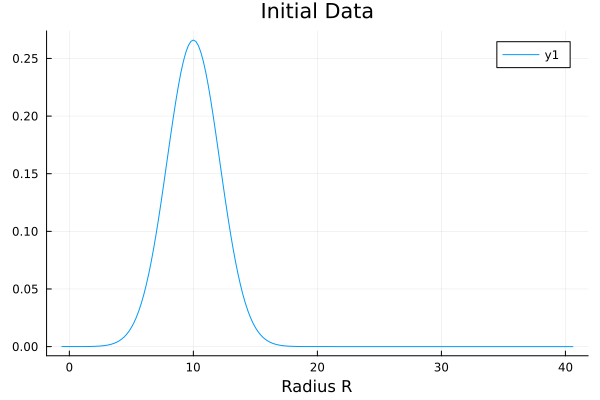

In [172]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, state_array[:,3], xaxis="Radius R",title="Initial Data")

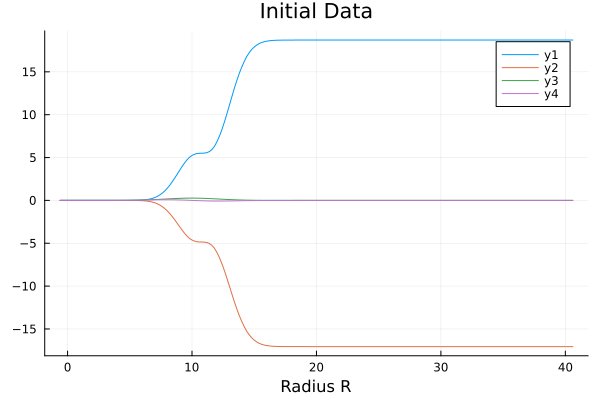

In [173]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, state_array, xaxis="Radius R",title="Initial Data")

In [174]:
print(state_array[:,4])

[-2.9059394863956346e-5, -1.707132244957811e-5, -7.8192541058477e-6, 0.0, 7.689629700730104e-6, 1.655282482910773e-5, 2.789277521789799e-5, 4.3279540017638025e-5, 6.4702301204469e-5, 9.474349404271486e-5, 0.0001367807699666971, 0.00019522129280422345, 0.0002757706956599848, 0.0003857359468381264, 0.0005343572211083911, 0.0007331585328926858, 0.0009963003407738216, 0.0013409096986914779, 0.0017873551148593046, 0.002359424616610759, 0.0030843573898844414, 0.003992672798752994, 0.005117736844934343, 0.006495006596446482, 0.008160899220732225, 0.010151245282806854, 0.012499306851492177, 0.015233370064867748, 0.01837395871421932, 0.02193075870529633, 0.025899390436300997, 0.0302582135716563, 0.034965391785107935, 0.03995647849813045, 0.04514280291028019, 0.05041093351405607, 0.05562346964287879, 0.060621357981463245, 0.06522785029942858, 0.06925411370344635, 0.07250638121959069, 0.07479439718617943, 0.0759407798072482, 0.07579080483227307, 0.07422202253463207, 0.07115306671351306, 0.0665510

In [175]:
using Interpolations
using ProgressMeter
@showprogress for k in 1:10
    
    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0) #evolve psi,x
    state_array=ghost(state_array)
    
    #calculate psi from psi,x
    interp = cubic_spline_interpolation(R[4:L-3], state_array[4:L-3,4],  extrapolation_bc = Line())

    psibar0=0
    SFconstraint_psi_new(psibar0,R1) = interp.(R1)

    state_array[:,3] = rungekutta4(SFconstraint_psi_new,psibar0,R)
    
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i

i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[

i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562

i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i

i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[

Progress:  20%|████████▎                                |  ETA: 0:00:02


i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.64956

i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 4

i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 

i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 

i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.6495624

i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562

i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.052102405

Progress:  40%|████████████████▍                        |  ETA: 0:00:01

154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.6495624627

i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651

i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.6495624627577

i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562

i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3

Progress:  60%|████████████████████████▋                |  ETA: 0:00:01

i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.64956246

i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562

i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] 

i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 

i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562

i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.00559702367508128

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:00

i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.64956

i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.

i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -

i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562

i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.

i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.6495624

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01



i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.64956

In [176]:
getting NaN in the last cell when I evolve psi here

LoadError: syntax: extra token "NaN" after end of expression

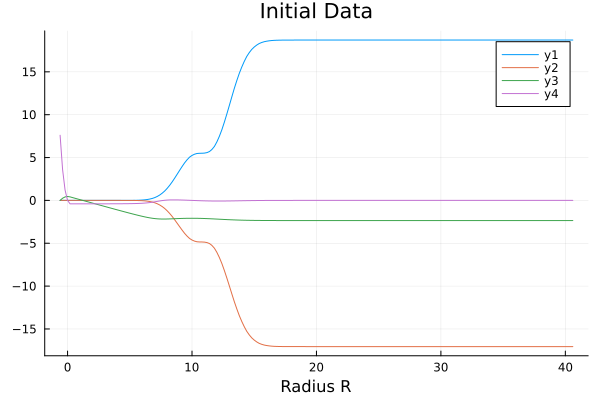

In [177]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, state_array, xaxis="Radius R",title="Initial Data")

 ## Evolution

In [178]:
using Interpolations
using ProgressMeter
@showprogress for k in 1:length(T)
    
    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0) #evolve psi,x
    state_array=ghost(state_array)
    
    #calculate psi from psi,x
    interp = cubic_spline_interpolation(R[4:L-3], state_array[4:L-3,4],  extrapolation_bc = Line())

    psibar0=0
    SFconstraint_psi_new(psibar0,R1) = interp.(R1)

    state_array[:,3] = rungekutta4(SFconstraint_psi_new,psibar0,R)
    
    #evolve m
    "m0=0
    state_array[4:L-3,1]=rk4wrapper(SFconstraint_m,m0,R1,T)"
    
    #evolve beta
    "beta0=0
    state_array[:,2]=rk4wrapper(SFconstraint_beta,beta0,R1,T)"
    
    state_array=ghost(state_array)
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i

i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[

i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562

i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i

i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[

Progress:   1%|▍                                        |  ETA: 0:00:23


i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.64956

i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 4

i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.0641522408

i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562

i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.500000

i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.629314

i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562

Progress:   2%|▉                                        |  ETA: 0:00:18

i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23

i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] =

i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562

i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4

i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i 

i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.6495624

Progress:   3%|█▎                                       |  ETA: 0:00:17

i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562

i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.6999628

i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562

i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[

i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -

i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562

i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16


Progress:   4%|█▋                                       |  ETA: 0:00:16

i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.49204672506715

i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[

i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562

i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43

i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664

i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.6495624627647

Progress:   5%|██                                       |  ETA: 0:00:16

162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.6495624627

i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] =

i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562

i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -

i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.64956246

i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 

Progress:   6%|██▌                                      |  ETA: 0:00:15

177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.6495624627

i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.6821948

i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562

i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i 

i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 d

i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 1

Progress:   7%|██▉                                      |  ETA: 0:00:15


i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.64956

i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257

i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.6495624

i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562

i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299

i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.6495624

Progress:   8%|███▎                                     |  ETA: 0:00:15

176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.6495624627

i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.052102405

i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562

i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.500000169591053

i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i 

Progress:   9%|███▊                                     |  ETA: 0:00:14

-7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i 

i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.8

i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.64956246275

i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43

i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i =

i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562

i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.97

Progress:  10%|████▏                                    |  ETA: 0:00:14

i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4]

i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562

i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.498

i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] 

i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562

i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[

Progress:  11%|████▌                                    |  ETA: 0:00:14


i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110

i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562

i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.

i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -

i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562

i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = 

i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] 

Progress:  12%|████▉                                    |  ETA: 0:00:14

i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.6495624

i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562

i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e

i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.6495624

i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 d

i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16


Progress:  13%|█████▍                                   |  ETA: 0:00:13

-7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i 

i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.

i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.64956246

i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.500000169591053

i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1

i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562

Progress:  14%|█████▊                                   |  ETA: 0:00:13

i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i 

i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562

i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i 

i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.6495624

i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562

Progress:  15%|██████▏                                  |  ETA: 0:00:13


i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.6495

i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[

i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -

i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562

i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e

i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.6495624

Progress:  16%|██████▌                                  |  ETA: 0:00:13

i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] 

i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 

i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.6495624

i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562

i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.052102405

Progress:  17%|███████                                  |  ETA: 0:00:13

110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.64956246275

i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562

i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.6999628

i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562

i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946

i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562

Progress:  18%|███████▍                                 |  ETA: 0:00:12

i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.500000

i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4]

i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562

i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842

i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] 

Progress:  19%|███████▊                                 |  ETA: 0:00:12


i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.64956

i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.8

i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462

i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562

i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[

Progress:  20%|████████▎                                |  ETA: 0:00:12


i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.64956

i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 4

i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 

i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.080939825053675

i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562

i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] 

i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.48928805

Progress:  21%|████████▋                                |  ETA: 0:00:12

172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.6495624627

i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.080939825053675

i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562

i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] 

i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.48928805

i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562

Progress:  22%|█████████                                |  ETA: 0:00:12

i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = 

i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] =

i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562

i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.6495624627647

i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562

Progress:  23%|█████████▍                               |  ETA: 0:00:12

-0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.95360213699

i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy

i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562

i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i =

i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i =

i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562

Progress:  24%|█████████▉                               |  ETA: 0:00:11

62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.95

i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562

i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = 

i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257

i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754

Progress:  25%|██████████▎                              |  ETA: 0:00:11


i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.64956

i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 6

i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562

i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy

i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 

i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562

Progress:  26%|██████████▋                              |  ETA: 0:00:11

i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562

i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.499995448302701

i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] =

i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562

i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.64956246

Progress:  27%|███████████▏                             |  ETA: 0:00:11

i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562

i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7


i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.6495624

i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16

i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562

i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.

i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16


Progress:  28%|███████████▌                             |  ETA: 0:00:11

i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562

i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.49999936

i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4]

i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562

i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842

i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.6495624

Progress:  29%|███████████▉                             |  ETA: 0:00:11


i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.64956

i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.71310288103

i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562

i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -

i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562

Progress:  30%|████████████▎                            |  ETA: 0:00:10

197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] 

i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] 

i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562

i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -

i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.64956246

i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562

Progress:  31%|████████████▊                            |  ETA: 0:00:10


i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240

i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562

i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.500000

i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.629314

i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 d

i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.8977231

Progress:  32%|█████████████▏                           |  ETA: 0:00:10


i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.6495

i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.

i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562

i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 4

i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i 

i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562

Progress:  33%|█████████████▌                           |  ETA: 0:00:10


i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 

i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.6495624

i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562

i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.0641522408

i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562

i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.

Progress:  34%|██████████████                           |  ETA: 0:00:10


i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 

i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562

i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i

i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562

i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.49999936

i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4]

i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562

Progress:  35%|██████████████▍                          |  ETA: 0:00:10


i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 2

i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] =

i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562

i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i

i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[

Progress:  36%|██████████████▊                          |  ETA: 0:00:09

169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.6495624627

i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7


i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.6495624

i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562

i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.6495624

i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562

Progress:  37%|███████████████▏                         |  ETA: 0:00:09


i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962

i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.6495624

i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562

i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.052102405

i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562

Progress:  38%|███████████████▋                         |  ETA: 0:00:09

i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4

i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562

i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy

i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 1

i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -

i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.64956246

Progress:  39%|████████████████                         |  ETA: 0:00:09

i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562

i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e

i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562

i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7


i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.6495624

i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562

Progress:  40%|████████████████▍                        |  ETA: 0:00:09


i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = 

i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562

i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = 

i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] =

i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562

i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -

Progress:  41%|████████████████▊                        |  ETA: 0:00:09

102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753

i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562

i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.499998228240

i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4]

i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562

i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911

i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[

Progress:  42%|█████████████████▎                       |  ETA: 0:00:09

-7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i 

i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.49999936

i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4]

i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562

i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842

i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562

Progress:  43%|█████████████████▋                       |  ETA: 0:00:08

184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.500000169607076

i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.629314

i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562

i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.50000016960

i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.30

i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562

Progress:  44%|██████████████████                       |  ETA: 0:00:08


i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0

i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -

i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562

i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = 

i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] =

Progress:  45%|██████████████████▌                      |  ETA: 0:00:08


i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.64956

i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] =

i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 

i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562

i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.499998228240

i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4]

i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562

Progress:  46%|██████████████████▉                      |  ETA: 0:00:08


i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671

i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.6495624

i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562

i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.052102405

i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562

Progress:  47%|███████████████████▎                     |  ETA: 0:00:08

185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i 

i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.30

i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562

i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.499995448302701

i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.6495624

i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562

Progress:  48%|███████████████████▋                     |  ETA: 0:00:08

i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299

i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.64956

i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.6495624

i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562

i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946

i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562

Progress:  49%|████████████████████▏                    |  ETA: 0:00:07


i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3

i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462

i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562

i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i 

i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.6495624

i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = 

Progress:  50%|████████████████████▌                    |  ETA: 0:00:07

128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.6495624627

i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23

i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] =

i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562

i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651

i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.6495624627577

Progress:  51%|████████████████████▉                    |  ETA: 0:00:07


i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.64956

i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562

i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651

i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.6495624627577

i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:07


i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.64956

i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.

i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.64956246

i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562

i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:07


i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.0002325

i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.6495624627577

i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562

i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562

i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.8

i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.64956246275

Progress:  54%|██████████████████████▏                  |  ETA: 0:00:07

i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562

i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562

i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4

i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 

i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562

Progress:  55%|██████████████████████▌                  |  ETA: 0:00:07

 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.6495624627531

i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.498

i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] 

i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562

i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562

Progress:  56%|███████████████████████                  |  ETA: 0:00:06


i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 1

i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = 

i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562

i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562

i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.

i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.2855533

i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:06


i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.64956

i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4

i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[

i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562

i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i =

Progress:  58%|███████████████████████▊                 |  ETA: 0:00:06


i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42

i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 

i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562

i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651

i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651

i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.6495624627647

Progress:  59%|████████████████████████▎                |  ETA: 0:00:06

i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562

i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4

i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] =

i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.6495624

i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562

i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.080939825053675

Progress:  60%|████████████████████████▋                |  ETA: 0:00:06


i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.64956

i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.052102405

i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562

i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.500000169591053

i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1

Progress:  61%|█████████████████████████                |  ETA: 0:00:06


i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.001106142966

i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.6495624627647

i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562

i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] =

i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.

i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.64956246

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:05


i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.64956

i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i 

i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.

i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.64956246

i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562

Progress:  63%|█████████████████████████▉               |  ETA: 0:00:05

i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 

i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.6495624

i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562

i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.052102405

i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562

i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.8

Progress:  64%|██████████████████████████▎              |  ETA: 0:00:05

-7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 1

i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562

i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i =

i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562

i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.71310288103

i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562

Progress:  65%|██████████████████████████▋              |  ETA: 0:00:05


i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696

i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562

i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012

i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754

i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562

Progress:  66%|███████████████████████████              |  ETA: 0:00:05

-7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122

i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562

i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 6

i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.6495624

i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] =

i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562

Progress:  67%|███████████████████████████▌             |  ETA: 0:00:05

i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.498

i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] 

i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562

i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 6

i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.6495624

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:05

-7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i 

i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] 

i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 

i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562

i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.00559702367508128

i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.64956246275

Progress:  69%|████████████████████████████▎            |  ETA: 0:00:04


i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.64956

i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i =

i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] 

i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562

i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.498

i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] 

i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562

Progress:  70%|████████████████████████████▊            |  ETA: 0:00:04

 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i 

i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-

i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562

i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -

i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.64956246

i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:04


i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.64956

i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288

i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-

i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562

i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -

i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.64956246

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:04

i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562

i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 1

i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562

i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257

i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754

Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:04


i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 

i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.6495624

i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562

i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946

i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.64956

i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] =

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:04

i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -

i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.64956246278236

i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562

i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -

i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.64956246

i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:04

i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562

i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.50000016960

i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.30

i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562

i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:03


i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.64956

i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 4

i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 

i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i =

i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i =

i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562

i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.8

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:03


i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.64956

i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i 

i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = 

i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562

i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i 

i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562

Progress:  78%|████████████████████████████████         |  ETA: 0:00:03

i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.499998228240

i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4]

i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562

i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i =

i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:03


i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3

i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462

i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288

i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.64956246278236

i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562

i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:03

138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.6495624627

i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4

i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[

i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.64956

i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[

i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:03

 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.6495624627531

i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy

i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16


i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562

i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.

i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.64956246

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:03

i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562

i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7


i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.6495624

i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562

i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946

i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:02


i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.50000

i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.2855533

i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562

i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] =

i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562

i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i

i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:02

i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562

i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 6

i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.6495624

i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562

i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.0641522408

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:02

-0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.07726591420671

i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.64956246

i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562

i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-

i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23

i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] =

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:02


i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.64956

i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4

i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.6495624

i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562

i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299

i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.64956

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:02

14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4

i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 

i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562

i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012

i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754

i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:02


i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240

i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562

i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.500000

i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562

i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.500000169591053

i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.30

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:02

i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 1

i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562

i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664

i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.6495624627577

i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562

i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] =

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:01

-7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i 

i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.49204672506715

i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[

i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i

i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i 

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:01

 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.6495624627531

i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43

i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 

i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562

i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.97

i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.64956246275

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:01

i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[

i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -

i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562

i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy

i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] 

i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562462753173e-16
i = 155 dy[4] = -7.649562462753173e-16
i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:01

-0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.231197

i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -9.018722414352569e-16
i = 86 dy[4] = -8.482171692299196e-16
i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 

i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 4

i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i 

i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562

i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.8

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:01


i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy

i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.6293147774521745e-15
i = 82 dy[4] = -1.3024631543091972e-15
i = 83 dy[4] = -1.0984711893459624e-15
i = 84 dy[4] = -9.8030923541869e-16
i = 85 dy[4] = -

i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.649562462753173e-16
i = 149 dy[4] = -7.649562462753173e-16
i = 150 dy[4] = -7.649562462753173e-16
i = 151 dy[4] = -7.649562462753173e-16
i = 152 dy[4] = -7.649562462753173e-16
i = 153 dy[4] = -7.649562462753173e-16
i = 154 dy[4] = -7.649562

i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.5000001695951146
i = 9 dy[4] = -0.5000001696070768
i = 10 dy[4] = -0.5000001695910533
i = 11 dy[4] = -0.5000001694764198
i = 12 dy[4] = -0.5000001687928066
i = 13 dy[4] = -0.5000001660767235
i = 14 dy[4] = -0.5000001570708196
i = 15 dy[4] = -0.5000001298984358
i = 16 dy[4] = -0.5000000537384697
i = 17 dy[4] = -0.4999998651415411
i = 18 dy[4] = -0.4999993613132678
i = 19 dy[4] = -0.49999822824070134
i = 20 dy[4] = -0.4999954483027016
i = 21 dy[4] = -0.4999892803363081
i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy

i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:01

i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.

i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.2855533

i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562462753173e-16
i = 141 dy[4] = -7.649562462753173e-16
i = 142 dy[4] = -7.649562462753173e-16
i = 143 dy[4] = -7.649562462753173e-16
i = 144 dy[4] = -7.649562462753173e-16
i = 145 dy[4] = -7.649562462753173e-16
i = 146 dy[4] = -7.649562462753173e-16
i = 147 dy[4] = -7.649562462753173e-16
i = 148 dy[4] = -7.64956

i = 87 dy[4] = -8.142040639760895e-16
i = 88 dy[4] = -7.957984361185056e-16
i = 89 dy[4] = -7.84308274262139e-16
i = 90 dy[4] = -7.767153357801234e-16
i = 91 dy[4] = -7.71591587463859e-16
i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 

i = 156 dy[4] = -7.649562462753173e-16
i = 157 dy[4] = -7.649562462753173e-16
i = 158 dy[4] = -7.649562462753173e-16
i = 159 dy[4] = -7.649562462753173e-16
i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562

i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.97

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:01

-7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i 

i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946

i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562462753173e-16
i = 140 dy[4] = -7.649562

i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.

i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 d

i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.6495624

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:00


i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.64956

i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946

i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562

i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946

i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562462753173e-16
i = 139 dy[4] = -7.649562

i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.649562462753173e-16
i = 198 dy[4] = -7.649562462753173e-16
i = 199 dy[4] = -7.649562462753173e-16
i = 200 dy[4] = -7.649562462753173e-16
i = 201 dy[4] = -7.649562462753173e-16
i = 202 dy[4] = -7.649562462753173e-16
i = 203 dy[4] = -7.649562462753173e-16
i = 204 dy[4] = -7.649562462753173e-16
i = 4 dy[4] = 0.0
i = 5 dy[4] = -0.5000001614155144
i = 6 dy[4] = -0.5000001689045714
i = 7 dy[4] = -0.500000169502761
i = 8 dy[4] = -0.500000

i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.0809398250536755e-9
i = 70 dy[4] = -1.6883159452946637e-10
i = 71 dy[4] = -2.713102881030445e-11
i = 72 dy[4] = -5.064152240871196e-12
i = 73 dy[4] = -1.0521024059649324e-12
i = 74 dy[4] = -2.68219489912265e-13
i = 75 dy[4] = -7.901880373327463e-14
i = 76 dy[4] = -2.699962831952081e-14
i = 77 dy[4] = -1.1806299569692637e-14
i = 78 dy[4] = -5.897723156231784e-15
i = 79 dy[4] = -3.489288058785656e-15
i = 80 dy[4] = -2.285553323269598e-15
i = 81 dy[4] = -1.629314

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:00


i = 92 dy[4] = -7.6851753364805e-16
i = 93 dy[4] = -7.670215988891498e-16
i = 94 dy[4] = -7.661615875631426e-16
i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e

i = 160 dy[4] = -7.649562462753173e-16
i = 161 dy[4] = -7.649562462753173e-16
i = 162 dy[4] = -7.649562462753173e-16
i = 163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562

i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3

i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.64956246

i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562

i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.6495624

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:00


i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.649562462753173e-16
i = 189 dy[4] = -7.649562462753173e-16
i = 190 dy[4] = -7.649562462753173e-16
i = 191 dy[4] = -7.649562462753173e-16
i = 192 dy[4] = -7.649562462753173e-16
i = 193 dy[4] = -7.649562462753173e-16
i = 194 dy[4] = -7.649562462753173e-16
i = 195 dy[4] = -7.649562462753173e-16
i = 196 dy[4] = -7.649562462753173e-16
i = 197 dy[4] = -7.64956

i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664559312
i = 50 dy[4] = -0.0004965651578498875
i = 51 dy[4] = -0.00023257748922204046
i = 52 dy[4] = -0.00012143261694210878
i = 53 dy[4] = -6.978257400683543e-5
i = 54 dy[4] = -4.831934810526928e-5
i = 55 dy[4] = -3.7456095326739e-5
i = 56 dy[4] = -3.21147611415242e-5
i = 57 dy[4] = -3.077265914206719e-5
i = 58 dy[4] = -3.051559894303779e-5
i = 59 dy[4] = -2.9536021369952303e-5
i = 60 dy[4] = -2.6676023979137835e-5
i = 61 dy[4] = -2.1319869924619116e-5
i = 62 dy[4] = -1.36488816657848e-5
i = 63 dy[4] = -7.13672123625803e-6
i = 64 dy[4] = -2.684392271664046e-6
i = 65 dy[4] = -8.095840470509607e-7
i = 66 dy[4] = -1.9917414960469856e-7
i = 67 dy[4] = -3.9159689854645283e-8
i = 68 dy[4] = -6.769683112412771e-9
i = 69 dy[4] = -1.080939825053675

i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.649562462757793e-16
i = 121 dy[4] = -7.649562462754586e-16
i = 122 dy[4] = -7.649562462753498e-16
i = 123 dy[4] = -7.6495624627532815e-16
i = 124 dy[4] = -7.649562462753227e-16
i = 125 dy[4] = -7.649562462753173e-16
i = 126 dy[4] = -7.649562462753173e-16
i = 127 dy[4] = -7.649562462753173e-16
i = 128 dy[4] = -7.649562462753173e-16
i = 129 dy[4] = -7.649562462753173e-16
i = 130 dy[4] = -7.649562462753173e-16
i = 131 dy[4] = -7.649562462753173e-16
i = 132 dy[4] = -7.649562462753173e-16
i = 133 dy[4] = -7.649562462753173e-16
i = 134 dy[4] = -7.649562462753173e-16
i = 135 dy[4] = -7.649562462753173e-16
i = 136 dy[4] = -7.649562462753173e-16
i = 137 dy[4] = -7.649562462753173e-16
i = 138 dy[4] = -7.649562

i = 22 dy[4] = -0.4999760557591669
i = 23 dy[4] = -0.49994859915262135
i = 24 dy[4] = -0.49989656237626257
i = 25 dy[4] = -0.49978844102697634
i = 26 dy[4] = -0.49958290513061493
i = 27 dy[4] = -0.49920281421411455
i = 28 dy[4] = -0.4986195491339036
i = 29 dy[4] = -0.4974842060566337
i = 30 dy[4] = -0.49543938911284574
i = 31 dy[4] = -0.4920467250671524
i = 32 dy[4] = -0.4865762235670671
i = 33 dy[4] = -0.4790035042805079
i = 34 dy[4] = -0.4665963265620902
i = 35 dy[4] = -0.44762828902647905
i = 36 dy[4] = -0.4210728947863105
i = 37 dy[4] = -0.38563689424464664
i = 38 dy[4] = -0.34244914575450575
i = 39 dy[4] = -0.28936097327941135
i = 40 dy[4] = -0.23119700109382596
i = 41 dy[4] = -0.17278303484602456
i = 42 dy[4] = -0.11958753925124015
i = 43 dy[4] = -0.07683493345160579
i = 44 dy[4] = -0.044754376796782944
i = 45 dy[4] = -0.024086507938462842
i = 46 dy[4] = -0.012043926960591669
i = 47 dy[4] = -0.005597023675081288
i = 48 dy[4] = -0.002492146568288866
i = 49 dy[4] = -0.0011061429664

i = 95 dy[4] = -7.656357971237526e-16
i = 96 dy[4] = -7.653036474895532e-16
i = 97 dy[4] = -7.6512206377310615e-16
i = 98 dy[4] = -7.650444428957108e-16
i = 99 dy[4] = -7.650038897488774e-16
i = 100 dy[4] = -7.649811602032628e-16
i = 101 dy[4] = -7.649677672774437e-16
i = 102 dy[4] = -7.64961113139823e-16
i = 103 dy[4] = -7.649586176219307e-16
i = 104 dy[4] = -7.649574324330383e-16
i = 105 dy[4] = -7.649568235185969e-16
i = 106 dy[4] = -7.649564880436134e-16
i = 107 dy[4] = -7.649563363986471e-16
i = 108 dy[4] = -7.649562864806773e-16
i = 109 dy[4] = -7.649562649055903e-16
i = 110 dy[4] = -7.649562547414806e-16
i = 111 dy[4] = -7.649562494917781e-16
i = 112 dy[4] = -7.64956247330567e-16
i = 113 dy[4] = -7.649562467061006e-16
i = 114 dy[4] = -7.649562464602602e-16
i = 115 dy[4] = -7.649562463540428e-16
i = 116 dy[4] = -7.649562463024831e-16
i = 117 dy[4] = -7.649562462831388e-16
i = 118 dy[4] = -7.649562462782361e-16
i = 119 dy[4] = -7.64956246276475e-16
i = 120 dy[4] = -7.6495624627577

Progress: 100%|█████████████████████████████████████████| Time: 0:00:14


163 dy[4] = -7.649562462753173e-16
i = 164 dy[4] = -7.649562462753173e-16
i = 165 dy[4] = -7.649562462753173e-16
i = 166 dy[4] = -7.649562462753173e-16
i = 167 dy[4] = -7.649562462753173e-16
i = 168 dy[4] = -7.649562462753173e-16
i = 169 dy[4] = -7.649562462753173e-16
i = 170 dy[4] = -7.649562462753173e-16
i = 171 dy[4] = -7.649562462753173e-16
i = 172 dy[4] = -7.649562462753173e-16
i = 173 dy[4] = -7.649562462753173e-16
i = 174 dy[4] = -7.649562462753173e-16
i = 175 dy[4] = -7.649562462753173e-16
i = 176 dy[4] = -7.649562462753173e-16
i = 177 dy[4] = -7.649562462753173e-16
i = 178 dy[4] = -7.649562462753173e-16
i = 179 dy[4] = -7.649562462753173e-16
i = 180 dy[4] = -7.649562462753173e-16
i = 181 dy[4] = -7.649562462753173e-16
i = 182 dy[4] = -7.649562462753173e-16
i = 183 dy[4] = -7.649562462753173e-16
i = 184 dy[4] = -7.649562462753173e-16
i = 185 dy[4] = -7.649562462753173e-16
i = 186 dy[4] = -7.649562462753173e-16
i = 187 dy[4] = -7.649562462753173e-16
i = 188 dy[4] = -7.6495624627

In [179]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1

Timestep two

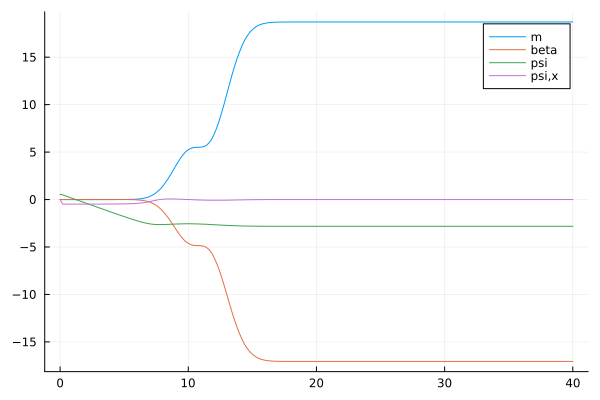

In [180]:
using Plots, CSV, DataFrames
import GR
n=2
time_step=T[n+1]-T[n];
IJulia.clear_output(true)
functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
plot()
    plot1=functions3.Column1[4:L-3];
    plot2=functions3.Column2[4:L-3];
    plot3=functions3.Column3[4:L-3];
    plot4=functions3.Column4[4:L-3];
d=round(T[n],digits=1)
plot!(R1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"]) |> display 
    

## Movie of the evolution

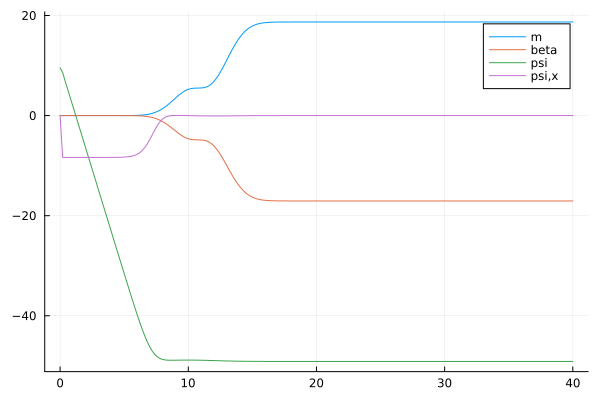

In [181]:
using Plots, CSV, DataFrames
import GR
for n in 1:1:length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
    d=round(T[n],digits=1)
    plot!(R1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"]) |> display 
    
    end

# Interpolation

In [77]:
N=3
x=zeros(N);
y=zeros(N);

x=[1.1, 2.8, 4.7]
x1=[1.1, 2.8, 4.8]
y=[1.5, 4.3, 16.1]

data=[x y];


using Interpolations
data[:,1]=x
data[:,2]=y
itp = cubic_spline_interpolation(10:12, 10:12,  extrapolation_bc = Line()) # create interpolation function
itp(9) # call function on input data (use itp.(x) to broadcast over input vector)

8.999999999999998

In [78]:
itp.([9, 8, 1])

3-element Vector{Float64}:
 8.999999999999998
 7.9999999999999964
 0.999999999999984

In [79]:
itp2 = cubic_spline_interpolation(R[4:L-3], state_array[4:L-3,4],  extrapolation_bc = Line())
itp2.(R)

207-element Vector{Float64}:
 -2.2492802065157096e-5
 -1.49952013767714e-5
 -7.4976006883857e-6
 -4.235164736271502e-22
  7.689629700730104e-6
  1.6552824829107725e-5
  2.7892775217897982e-5
  4.327954001763802e-5
  6.470230120446899e-5
  9.474349404271483e-5
  0.00013678076996669706
  0.00019522129280422345
  0.0002757706956599848
  ⋮
 -2.01566457731864e-39
 -5.719520396176462e-40
 -1.6084935678107224e-40
 -4.483299003815029e-41
 -1.238497196306582e-41
 -3.3908734463825724e-42
 -9.201267173992415e-43
 -2.4745912801619788e-43
 -6.595980413957055e-44
  4.924866297391118e-44
  1.644571300873888e-43
  2.7966559720087055e-43

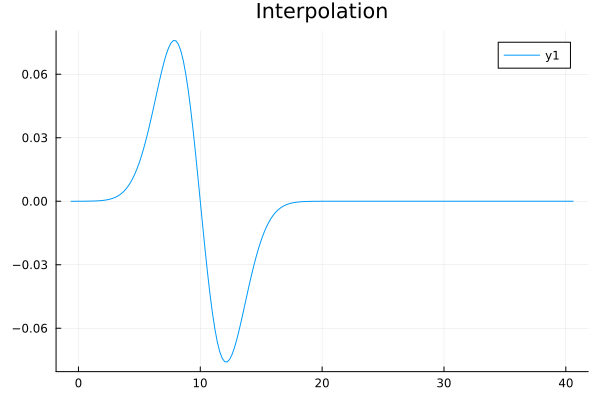

In [80]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, itp2.(R),title="Interpolation")

In [81]:
psibar0=0
SFconstraint_psi_new(psibar0,R1) = itp2.(R1)

integration = rungekutta4(SFconstraint_psi_new,psibar0,R1)

201-element Vector{Float64}:
  0.0
  7.593615194557902e-7
  3.153733052908858e-6
  7.544874151946501e-6
  1.4579476734114407e-5
  2.5257454987628783e-5
  4.103276552659288e-5
  6.395174800239e-5
  9.683503246584859e-5
  0.00014350975614535846
  0.00020909900645941614
  0.0003003748605932674
  0.00042617989754202296
  ⋮
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6

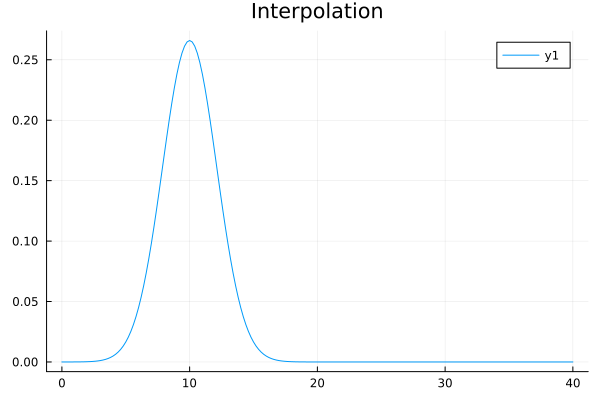

In [82]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R1, integration,title="Interpolation")